# Exam: Numerical Analysis for Machine Learning
## September 6, 2023

### Exercise 1

Load the image:

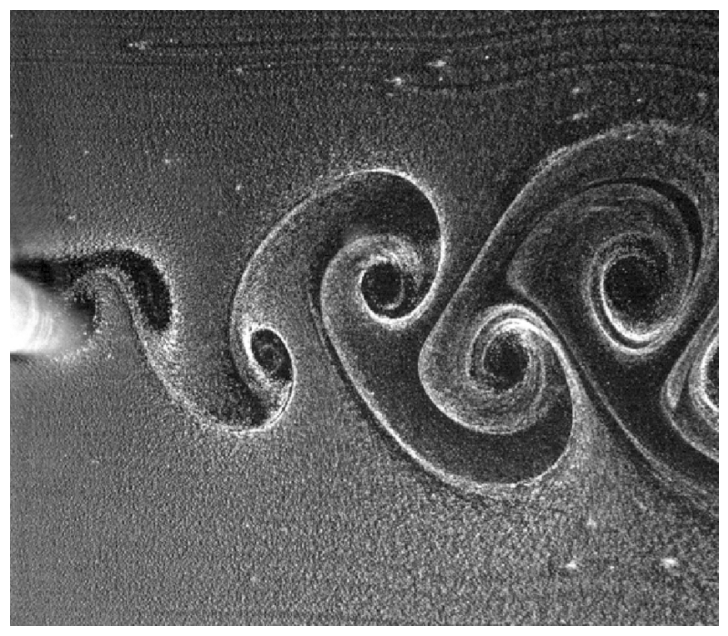

In [6]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

plt.rcParams['figure.figsize'] = [16,8]

A =imread(os.path.join('.','karman_vortex.png'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X, cmap = 'gray')
plt.axis('off')
plt.show()

#### 1) Compute the economy SVD

In [10]:
U, S, VT = np.linalg.svd(X, full_matrices=False)

#### 2) Let $X$ be the matrix representing the true images and $\tilde{X}$ the approximation of rank $r$ obtained using the SVD. Compute and plot the relative reconstruction error of the truncated SVD in the Frobenius norm as a function of the rank $r$. The expression of the relative reconstruction error is given by:

$$\frac{\|X - \tilde{X}\|_F}{\|X\|_F}$$

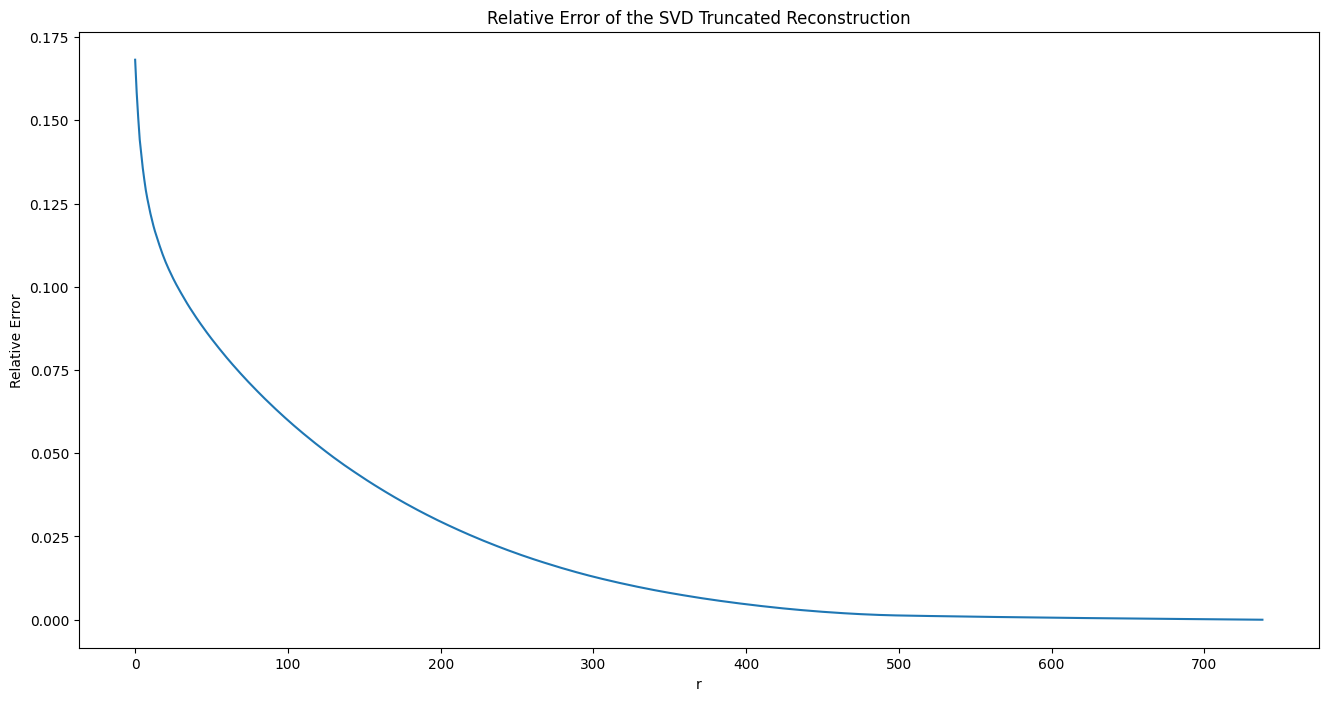

In [12]:
reconst = lambda r: U[:, :r] @ np.diag(S[:r]) @ VT[:r, :]
reconst_error = lambda r: np.linalg.norm(X - reconst(r)) / np.linalg.norm(X)

plt.plot([reconst_error(r) for r in range(1, len(S)+1)])

plt.xlabel('r')
plt.ylabel('Relative Error')
plt.title('Relative Error of the SVD Truncated Reconstruction')
plt.show()


#### 3) Square this error (and plot it) to compute the fraction of the missing variance as a function of $r$

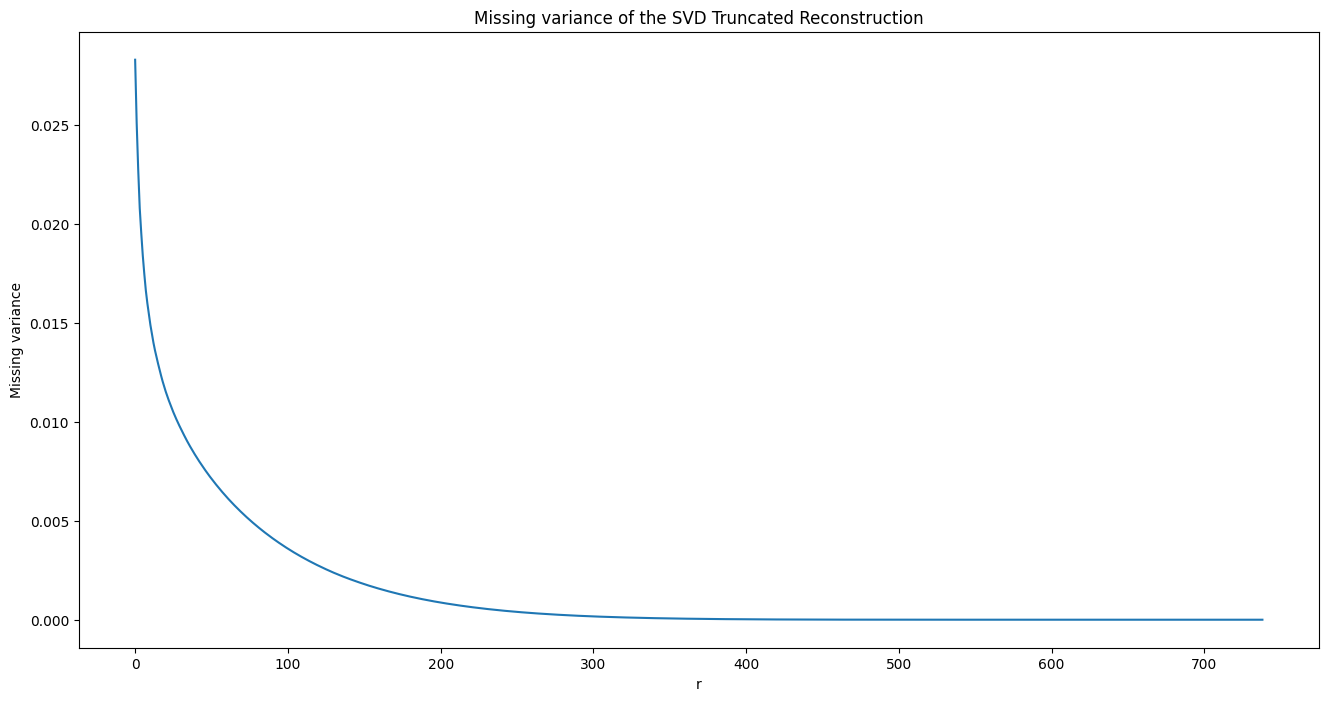

In [13]:
plt.plot([reconst_error(r) ** 2 for r in range(1, len(S)+1)])

plt.xlabel('r')
plt.ylabel('Missing variance')
plt.title('Missing variance of the SVD Truncated Reconstruction')
plt.show()


#### 4) Find $r$ from which the reconstruction captures 99% of the total variance

In [19]:
exp_var_eq = lambda r: 1 - reconst_error(r) ** 2
rang = np.arange(1, len(S)+1)

explained_variance = np.array([exp_var_eq(r) for r in rang])

In [22]:
r_min = rang[explained_variance >= 0.99][0]

print(f"The minimum r to explain 99% of the variance is {r_min}")

The minimum r to explain 99% of the variance is 29


### Exercise 2

Generate 100 artificial data points $(x_i, y_i)$ where $x_i$ is randomly generated in the interval $[0, 1]$ and $y_i = \cos(4 \pi x_i) + \epsilon$; $\epsilon$ is a random noise in the interval $[-0.2, 0.2]$. Implement the SGD method to solve a regression problem for the data you have generated. Use an initial constant learning rate $\eta = 0.001$ and train a polynomial of the form $h_c = c_0 + c_1 x + ... + c_n x^n$ using your data ($n$ is the maximum degree of the polynomial). Assume that all the initial parameters $c_i$ are randomlly generated in $[-0.4, 0.4]$. Try different values of $n$, and different values of $\eta$ to speed up the learning process. Plot the various results and comment them. 

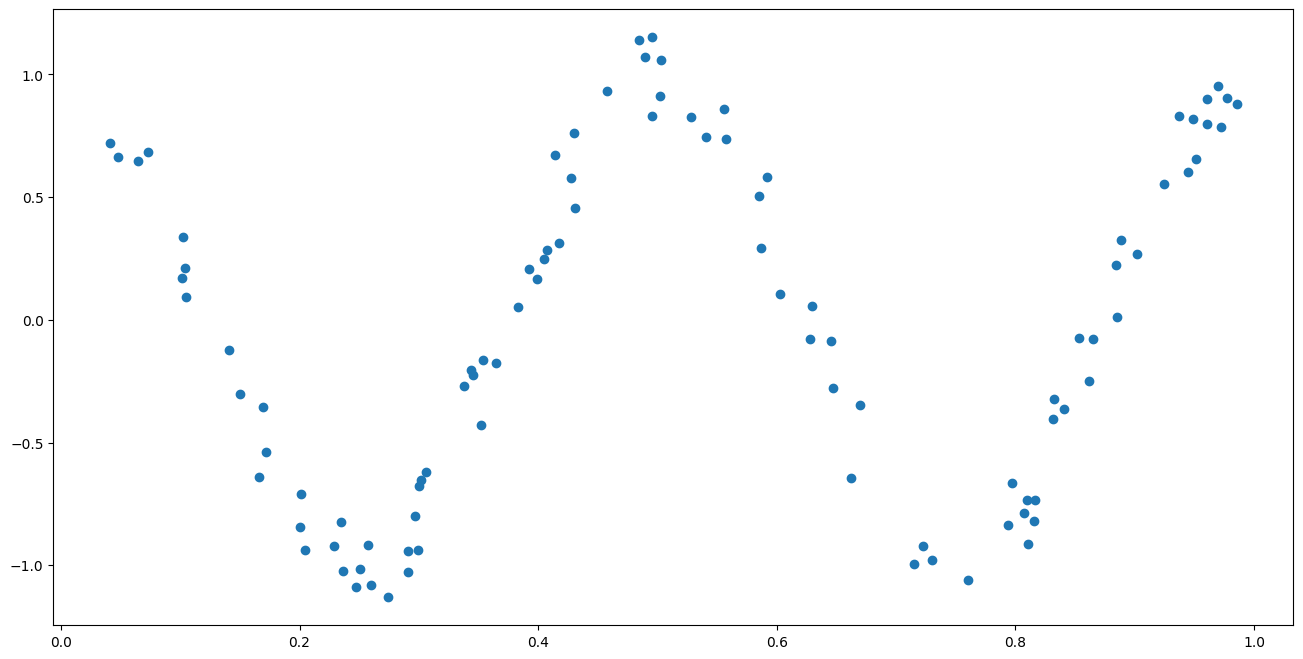

In [119]:
x = np.random.rand(100)

eps = np.random.rand(100) * 0.4 - 0.2
y = np.cos(4 * np.pi * x) + eps

plt.scatter(x, y)

Ready for n = 4, alpha = 0.1
Ready for n = 4, alpha = 0.01
Ready for n = 4, alpha = 0.001
Ready for n = 4, alpha = 0.0001
Ready for n = 4, alpha = 0.0001
Ready for n = 6, alpha = 0.1
Ready for n = 6, alpha = 0.01
Ready for n = 6, alpha = 0.001
Ready for n = 6, alpha = 0.0001
Ready for n = 6, alpha = 0.0001
Ready for n = 8, alpha = 0.1
Ready for n = 8, alpha = 0.01
Ready for n = 8, alpha = 0.001
Ready for n = 8, alpha = 0.0001
Ready for n = 8, alpha = 0.0001
Ready for n = 10, alpha = 0.1
Ready for n = 10, alpha = 0.01
Ready for n = 10, alpha = 0.001
Ready for n = 10, alpha = 0.0001
Ready for n = 10, alpha = 0.0001
Ready for n = 12, alpha = 0.1
Ready for n = 12, alpha = 0.01
Ready for n = 12, alpha = 0.001
Ready for n = 12, alpha = 0.0001
Ready for n = 12, alpha = 0.0001


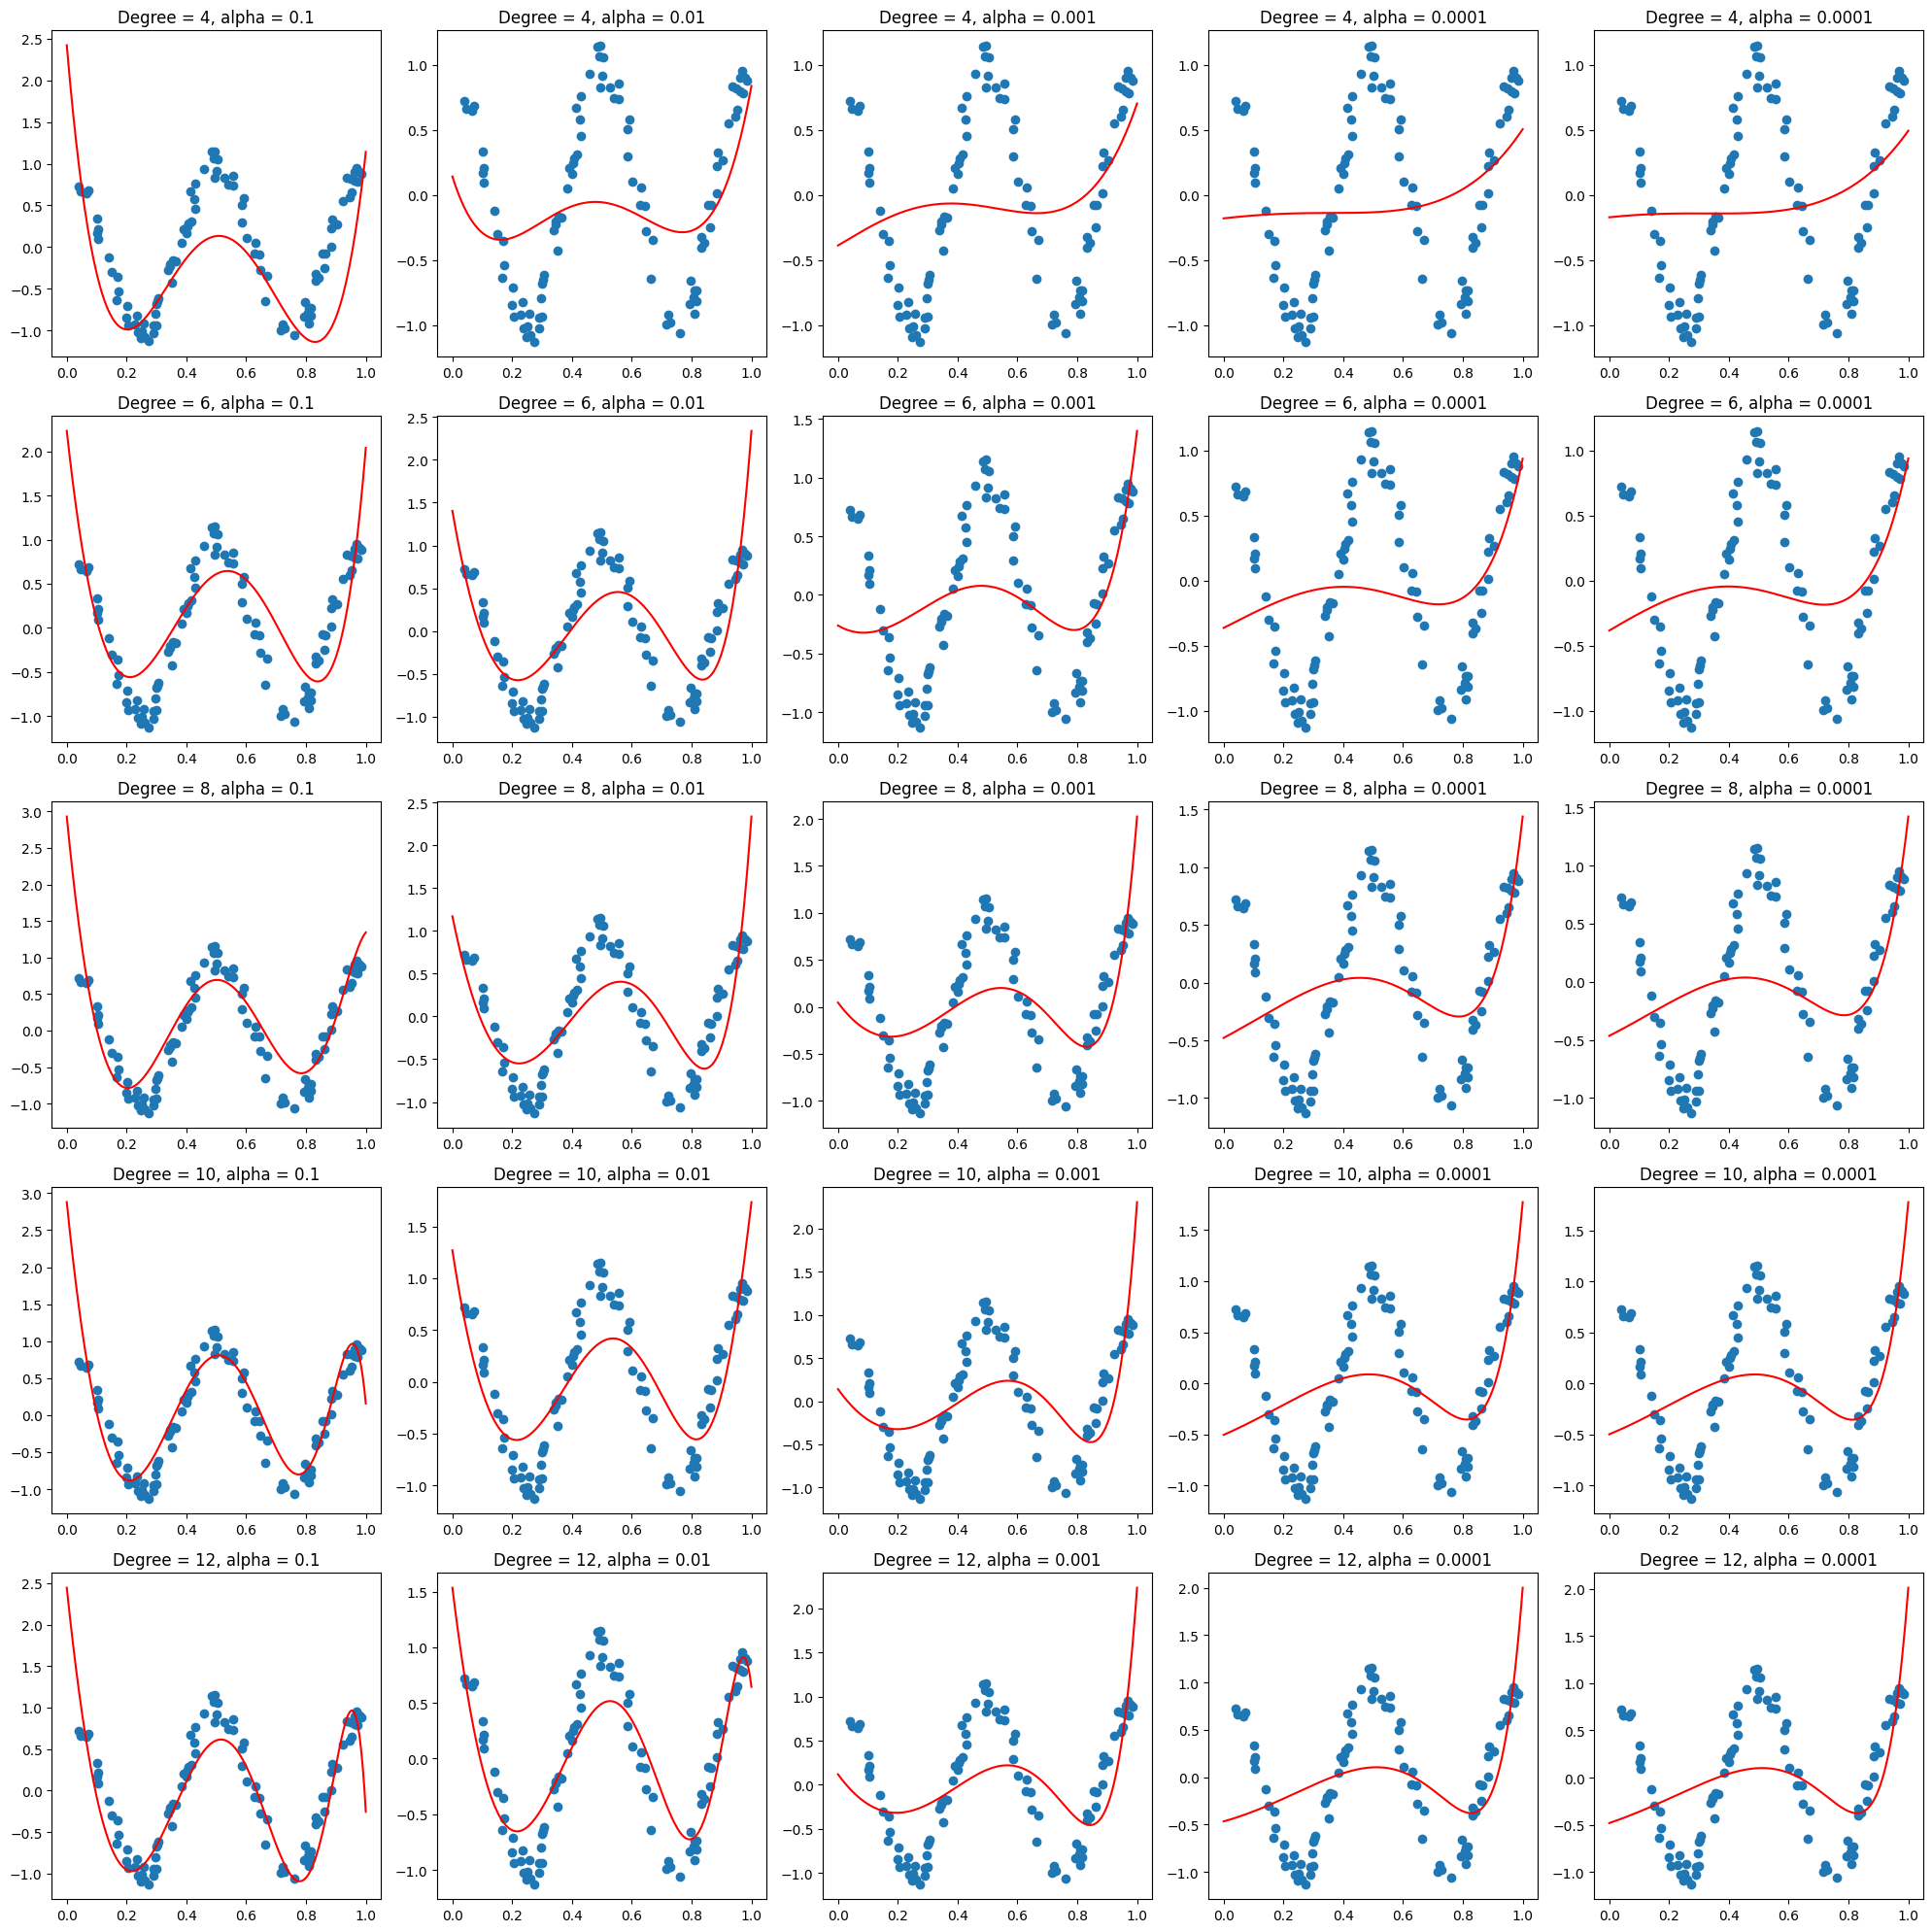

In [121]:
import numpy as np
np.random.seed(42)


def SGD_polyfit(
    x, y, degree, lr=0.01, n_epoch=50000, verbose=False
):
    w = np.random.rand(degree + 1)
    X = np.vander(x, degree + 1, increasing=False)

    for _ in range(n_epoch):
        idxs = np.arange(len(x))
        np.random.shuffle(idxs)
        
        for i in idxs:
            xi = X[i].reshape(1, -1)
            yi = y[i]

            y_pred = xi.dot(w)
            error = y_pred - yi

            grad = 2 * xi.T * error

            w = w - lr * grad.flatten()

        if _ % 10000 == 0 and verbose:
            y_preds = X.dot(w)
            loss = np.mean((y - y_preds)**2)
            print(f"Epoch {_}: Loss = {loss}")

    return w

n_s = [4, 6, 8, 10, 12]
alphas = [0.1, 0.01, 0.001, 0.0001, 0.0001]

fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i, n in enumerate(n_s):
    for j, alpha in enumerate(alphas):
        w = SGD_polyfit(x, y, n, lr=alpha, verbose=False)

        x_test = np.linspace(0, 1, 200)

        X = np.vander(x_test, n + 1, increasing=False)
        y_preds = X.dot(w)
        ax[i, j].scatter(x, y)
        ax[i, j].plot(x_test, y_preds, color='red')
        ax[i, j].set_title(f"Degree = {n}, alpha = {alpha}")

        print(f"Ready for n = {n}, alpha = {alpha}")

plt.tight_layout()
plt.show()
    

Epoch 0: Loss = 0.5794761864501448
Epoch 10000: Loss = 0.10194339507354018
Epoch 20000: Loss = 0.08410539655588244
Epoch 30000: Loss = 0.07329521626014393
Epoch 40000: Loss = 0.05368894849209165


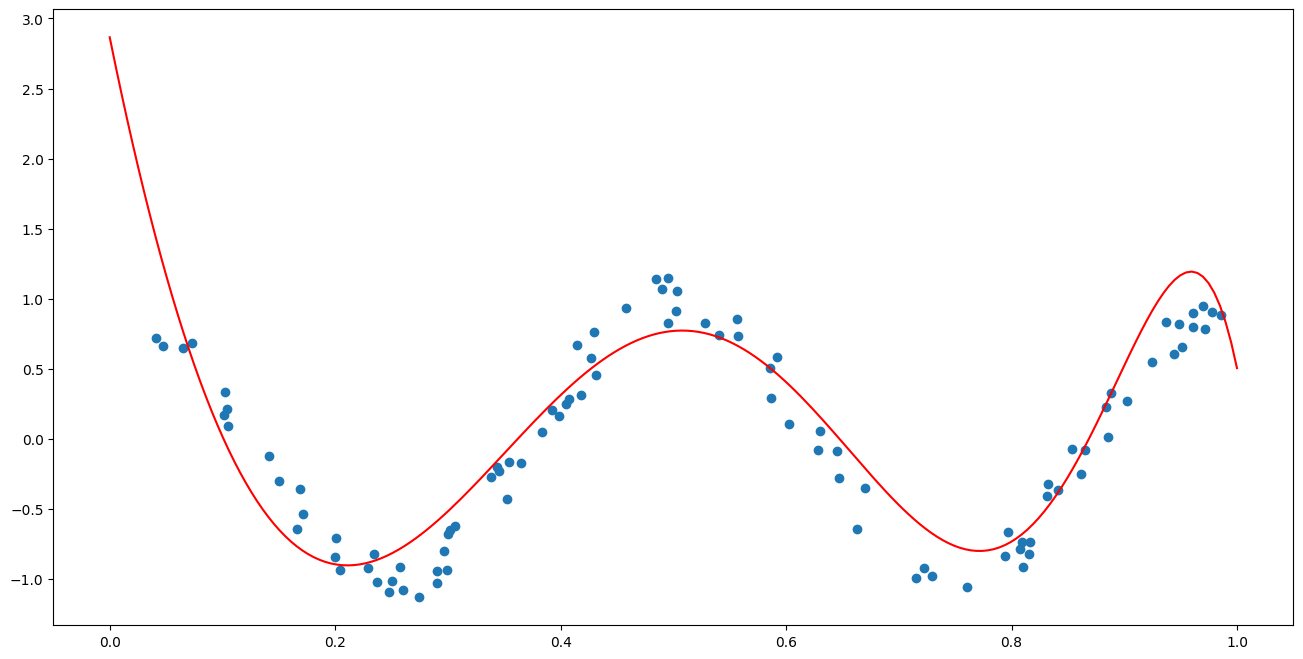

In [122]:
final_deg = 10
final_alpha = 0.1

w = SGD_polyfit(x, y, final_deg, lr=final_alpha, verbose=True)

x_test = np.linspace(0, 1, 200)

X = np.vander(x_test, final_deg + 1, increasing=False)
y_preds = X.dot(w)

plt.scatter(x, y)
plt.plot(x_test, y_preds, color='red')
plt.show()

### Exercise 3

Consider a sigmoid neuron with 1D input $x$, weight $w$, bias $b$ and output $\sigma(w x + b)$. The target is the variable $z$. Consider the cost function $J(w, b) = \frac{1}{2} (y - z)^2$.

* Find $\nabla J(w, b)$ and show that $\|\nabla J\| < \frac{1}{4} \sqrt{1 + x^2} (1 + |z|)$

**Answer:**

$$\frac{\partial J}{\partial w} = (y - z) y (1 - y) x$$

$$\frac{\partial J}{\partial b} = (y - z) y (1 - y)$$

Then:

$$\|\nabla J\| = \sqrt{(y - z)^2 y^2 (1 - y)^2 (1 + x^2)}$$
$$ = |y - z| y (1 - y) \sqrt{1 + x^2}$$

Note that, if $g(y) = y(1 - y)$, then $\max_y g(y) = 0.25$, and it is reached at $y = 0.5$ within the domain of $y$. So:

$$\leq \frac{1}{4} |y - z| \sqrt{1 + x^2}$$

Then, as $y \in (0, 1)$, we have that:

$$|y - z| < |1 - z| \leq 1 + |z|$$

So:

$$\|\nabla J\| < \frac{1}{4} \sqrt{1 + x^2} (1 + |z|)$$ 


* Write the gradient descent iteration for the sequence $(w_n, b_n)$

**Answer:**

As the function is convex, and we just showed that it is also Lipschitz, then we can use $\eta = \frac{1}{L} = \frac{4}{(1 + |z|) \sqrt{1 + x^2}}$.

Then, the method is as follows:

$$w^{(k+1)} = w^{(k)} - \frac{4}{(1 + |z|) \sqrt{1 + x^2}} (y^{(k)} - z) y^{(k)} (1 - y^{(k)}) x$$
$$b^{(k+1)} = b^{(k)} - \frac{4}{(1 + |z|) \sqrt{1 + x^2}} (y^{(k)} - z) y^{(k)} (1 - y^{(k)})$$